In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Scikit-learn for Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# TensorFlow and Keras for Model Building
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# TensorFlow Dataset API for Handling Large Data
from tensorflow.data import Dataset


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# prompt: import this file '/content/Construction_Time_Series_Dataset.csv'  ,  use the Month-Year column as the time columns

df = pd.read_csv('/content/Julius_Berger_Construction_Time_Series_Dataset.csv', parse_dates=['Month-Year'], index_col='Month-Year')


In [6]:
df.head()

,Project Type,Planned Duration (in days),Progress (%),Resource Utilization (%),Change Orders (Count),Weather Conditions (Severity Index),Delay Occurrence,Delay Duration (in days),Contract Type,Seasonality,Economic Indicator (Inflation Rate),Economic Indicator (Exchange Rate)
Month-Year,,,,,,,,,,,,
2009-01-01,Building,192,37.43,81.32,2,0.39,0,0,Cost-Plus,Dry Season,6.81,425.69
2009-02-01,Building,192,54.10,81.32,2,0.39,0,0,Cost-Plus,Dry Season,6.81,425.69
2009-03-01,Building,192,70.76,81.32,2,0.39,0,0,Cost-Plus,Dry Season,6.81,425.69
2009-04-01,Building,192,87.43,81.32,2,0.39,0,0,Cost-Plus,Dry Season,6.81,425.69
2009-05-01,Building,192,100.00,81.32,2,0.39,0,0,Cost-Plus,Dry Season,6.81,425.69


In [7]:
df.describe()

,Planned Duration (in days),Progress (%),Resource Utilization (%),Change Orders (Count),Weather Conditions (Severity Index),Delay Occurrence,Delay Duration (in days),Economic Indicator (Inflation Rate),Economic Indicator (Exchange Rate)
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,242.346667,78.632600,73.076800,7.630000,5.936600,0.860000,51.210000,11.958933,471.442300
std,79.486814,27.245734,10.979772,4.205399,3.289939,0.347567,31.996225,4.654969,62.487163
min,33.000000,1.140000,51.070000,0.000000,0.040000,0.000000,0.000000,5.010000,353.000000
25%,191.500000,61.847500,64.050000,4.000000,3.230000,1.000000,28.000000,8.490000,425.690000
50%,255.000000,94.525000,75.420000,7.000000,6.740000,1.000000,52.000000,11.460000,475.590000
75%,312.000000,100.000000,81.625000,12.000000,8.850000,1.000000,84.000000,16.670000,504.300000
max,346.000000,100.000000,93.240000,14.000000,9.850000,1.000000,96.000000,19.910000,593.120000


In [8]:
# prompt: datatype of each columns

print(df.dtypes)


Project Type                            object
Planned Duration (in days)               int64
Progress (%)                           float64
Resource Utilization (%)               float64
Change Orders (Count)                    int64
Weather Conditions (Severity Index)    float64
Delay Occurrence                         int64
Delay Duration (in days)                 int64
Contract Type                           object
Seasonality                             object
Economic Indicator (Inflation Rate)    float64
Economic Indicator (Exchange Rate)     float64
dtype: object


In [9]:
# prompt: kindly check for missing data

missing_data = df.isnull().sum()
print(missing_data)


Project Type                           0
Planned Duration (in days)             0
Progress (%)                           0
Resource Utilization (%)               0
Change Orders (Count)                  0
Weather Conditions (Severity Index)    0
Delay Occurrence                       0
Delay Duration (in days)               0
Contract Type                          0
Seasonality                            0
Economic Indicator (Inflation Rate)    0
Economic Indicator (Exchange Rate)     0
dtype: int64


In [10]:
# prompt: check for number of unique data in each column

for column in df.columns:
  print(f"Unique values in {column}: {df[column].nunique()}")


Unique values in Project Type: 3
Unique values in Planned Duration (in days): 47
Unique values in Progress (%): 174
Unique values in Resource Utilization (%): 51
Unique values in Change Orders (Count): 15
Unique values in Weather Conditions (Severity Index): 48
Unique values in Delay Occurrence: 2
Unique values in Delay Duration (in days): 33
Unique values in Contract Type: 2
Unique values in Seasonality: 2
Unique values in Economic Indicator (Inflation Rate): 51
Unique values in Economic Indicator (Exchange Rate): 51


In [11]:
# prompt: print columns and list of uniques values

for column in df.columns:
  print(f"Column: {column}")
  print(f"Unique values: {df[column].unique()}")



Column: Project Type
Unique values: ['Building' 'Road' 'Bridge']
Column: Planned Duration (in days)
Unique values: [192 237 198 190  97 318 306 333 164 224 157  62 205  51 267 187  67 259
  80 293 312  56 255 315 126 313 346 176  33  64 221  78  46 201 249  75
  35 128 262  66 309 331 210 124 217 145 220]
Column: Progress (%)
Unique values: [ 37.43  54.1   70.76  87.43 100.    37.06  51.35  65.63  79.92  94.2
  81.28  97.95  94.72  98.6   75.34  85.34  95.34  37.63  47.63  57.63
  67.63  77.63  87.63  97.63   8.35  17.44  26.53  35.62  44.71  53.8
  62.9   71.99  81.08  90.17  99.26  77.71  97.71  55.84  70.13  84.41
  98.7   42.42  62.42  82.42  90.64  11.12  27.79  44.45  61.12  77.79
  94.45  49.26   1.14  13.64  26.14  38.64  51.14  63.64  76.14  88.64
  46.87  63.54  80.2   96.87   5.63  55.63  11.88  24.38  36.88  49.38
  61.88  74.38  86.88  99.38  11.75  61.75  64.92  76.03  87.14  98.25
  74.6   84.6   94.6   58.34  96.22  37.49  47.49  57.49  67.49  77.49
  87.49  97.49  28.5

In [12]:
# Step 1: Identify and Remove Duplicates
duplicate_rows = df[df.duplicated()]
num_duplicate_rows = len(duplicate_rows)
print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 89


In [13]:
# Drop duplicate rows
df = df.drop_duplicates()

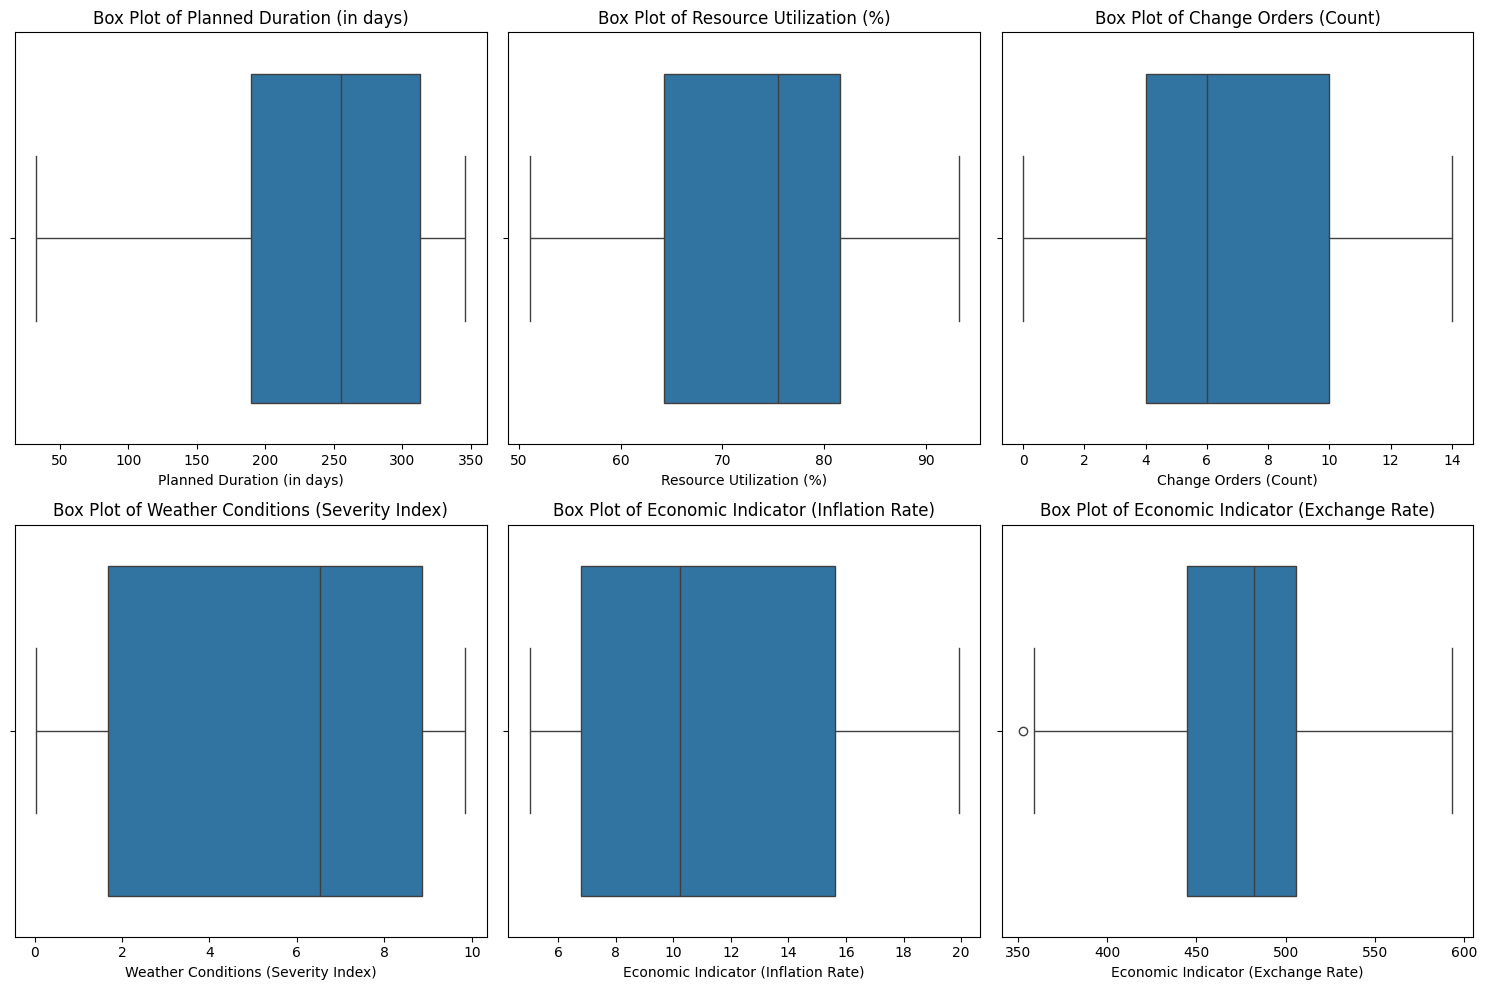

In [14]:
#Visualizing Outliers Using Box Plots for Numerical Columns
numerical_cols = ['Planned Duration (in days)', 'Resource Utilization (%)',
                  'Change Orders (Count)', 'Weather Conditions (Severity Index)',
                  'Economic Indicator (Inflation Rate)', 'Economic Indicator (Exchange Rate)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [15]:
# Statistical Outlier Check using IQR
outlier_counts = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_counts[col] = len(outliers)
    print(f"{col}: {len(outliers)} potential outliers")



Planned Duration (in days): 0 potential outliers
Resource Utilization (%): 0 potential outliers
Change Orders (Count): 0 potential outliers
Weather Conditions (Severity Index): 0 potential outliers
Economic Indicator (Inflation Rate): 0 potential outliers
Economic Indicator (Exchange Rate): 1 potential outliers


In [16]:
# Step 3:Report the number of outliers in each column
print("Outlier counts by column:", outlier_counts)

Outlier counts by column: {'Planned Duration (in days)': 0, 'Resource Utilization (%)': 0, 'Change Orders (Count)': 0, 'Weather Conditions (Severity Index)': 0, 'Economic Indicator (Inflation Rate)': 0, 'Economic Indicator (Exchange Rate)': 1}


In [17]:
# Step 2: One-Hot Encode categorical features
categorical_cols = ['Project Type', 'Contract Type', 'Seasonality']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [18]:
# Step 3: Normalize/Standardize the numerical columns
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [19]:
# Step 4: Split dataset into training and testing sets
X = df_encoded.drop('Delay Duration (in days)', axis=1)  # Features
y = df_encoded['Delay Duration (in days)']  # Target

In [20]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Display the processed dataset
df_encoded.head()


,Planned Duration (in days),Progress (%),Resource Utilization (%),Change Orders (Count),Weather Conditions (Severity Index),Delay Occurrence,Delay Duration (in days),Economic Indicator (Inflation Rate),Economic Indicator (Exchange Rate),Project Type_Bridge,Project Type_Building,Project Type_Road,Contract Type_Cost-Plus,Contract Type_Fixed-Price,Seasonality_Dry Season,Seasonality_Rainy Season
Month-Year,,,,,,,,,,,,,,,,
2009-01-01,-0.54789,37.43,0.803739,-1.32302,-1.593435,0,0,-0.969189,-0.882555,False,True,False,True,False,True,False
2009-02-01,-0.54789,54.10,0.803739,-1.32302,-1.593435,0,0,-0.969189,-0.882555,False,True,False,True,False,True,False
2009-03-01,-0.54789,70.76,0.803739,-1.32302,-1.593435,0,0,-0.969189,-0.882555,False,True,False,True,False,True,False
2009-04-01,-0.54789,87.43,0.803739,-1.32302,-1.593435,0,0,-0.969189,-0.882555,False,True,False,True,False,True,False
2009-05-01,-0.54789,100.00,0.803739,-1.32302,-1.593435,0,0,-0.969189,-0.882555,False,True,False,True,False,True,False


In [22]:
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

Training Set: (168, 15), Test Set: (43, 15)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already prepared after preprocessing
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')


Mean Absolute Error (MAE): 14.934001436263516
Mean Squared Error (MSE): 358.26447904725046


In [24]:
baseline_prediction = np.mean(y_train)
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
baseline_mse = mean_squared_error(y_test, [baseline_prediction] * len(y_test))

print(f"Baseline MAE: {baseline_mae}")
print(f"Baseline MSE: {baseline_mse}")


Baseline MAE: 25.70265780730897
Baseline MSE: 891.0577835785479


In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [26]:
# Sort df_sorted by time-related feature (Month-Year or another time column)
df_sorted = df_encoded.sort_values('Month-Year')

In [27]:
# We will predict 'Delay Duration (in days)' as the target time series variable
target_column = 'Delay Duration (in days)'  # Target variable
feature_columns = ['Planned Duration (in days)', 'Resource Utilization (%)',
                   'Change Orders (Count)', 'Weather Conditions (Severity Index)',
                   'Economic Indicator (Inflation Rate)', 'Economic Indicator (Exchange Rate)']


In [28]:
# Extract features and target
X = df_sorted[feature_columns].values
y = df_sorted[target_column].values

In [29]:
#Scale the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [30]:
#Prepare the data for LSTM
def create_sequences(data, target, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i + seq_length])
        y_seq.append(target[i + seq_length])
    return np.array(X_seq), np.array(y_seq)

In [31]:
# Define sequence length ( 12 months)
sequence_length = 12
X_lstm, y_lstm = create_sequences(X, y_scaled, sequence_length)


In [32]:
# Reshape input for LSTM (samples, time steps, features)
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], X_lstm.shape[2]))


In [33]:
# Build the LSTM model
model_lstm = Sequential()

In [34]:
# LSTM layers
model_lstm.add(LSTM(100, activation='relu', input_shape=(sequence_length, X_lstm.shape[2])))
model_lstm.add(Dense(1))  # Output layer for regression

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
#Train the model
history = model_lstm.fit(X_lstm, y_lstm, epochs=250, batch_size=32, validation_split=0.2)


Epoch 1/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.3312 - val_loss: 0.1344
Epoch 2/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1409 - val_loss: 0.1210
Epoch 3/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1506 - val_loss: 0.1204
Epoch 4/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1136 - val_loss: 0.0971
Epoch 5/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0984 - val_loss: 0.0924
Epoch 6/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1022 - val_loss: 0.0931
Epoch 7/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0940 - val_loss: 0.0959
Epoch 8/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0928 - val_loss: 0.1012
Epoch 9/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0862 - val_loss: 0.1067
Epoch 10/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0909 - val_loss: 0.1066
Epoch 11/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0816 - val_loss: 0.1048
Epoch 12/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0793 - val_lo

In [37]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model_lstm.fit(X_lstm, y_lstm, epochs=250, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0014 - val_loss: 1.5025
Epoch 2/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 9.7539e-04 - val_loss: 1.4829
Epoch 3/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0012 - val_loss: 1.4703
Epoch 4/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0010 - val_loss: 1.5227
Epoch 5/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0010 - val_loss: 1.4344
Epoch 6/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.7476e-04 - val_loss: 1.5332
Epoch 7/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.1082e-04 - val_loss: 1.4977
Epoch 8/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.7151e-04 - val_loss: 1.5232
Epoch 9/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.0202e-04 - val_loss: 1.4694
Epoch 10/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.2640e-04 - val_loss: 1.4790
Epoch 11/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.7457e-04 - val_loss: 1.5085
Epoch 12/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/

Epoch 1/250


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.3231 - val_loss: 0.3274
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1419 - val_loss: 0.2148
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1288 - val_loss: 0.1860
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1309 - val_loss: 0.1948
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0995 - val_loss: 0.2088
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0895 - val_loss: 0.2200
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0890 - val_loss: 0.2214
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0860 - val_loss: 0.2174
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0859 - val_loss: 0.2155
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0761 - val_loss: 0.2170
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0761 - val_loss: 0.2210
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0850 - val_loss: 0.2234
E

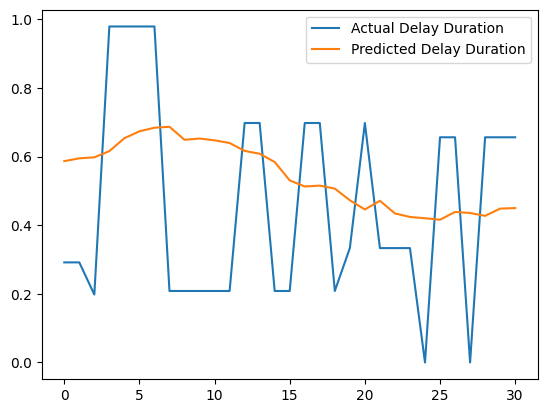

In [38]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming df_sorted is your time-ordered dataset, already sorted and preprocessed
# Define the target and features
target_column = 'Delay Duration (in days)'
feature_columns = ['Planned Duration (in days)', 'Resource Utilization (%)',
                   'Change Orders (Count)', 'Weather Conditions (Severity Index)',
                   'Economic Indicator (Inflation Rate)', 'Economic Indicator (Exchange Rate)']

# Extract features and target
X = df_sorted[feature_columns].values
y = df_sorted[target_column].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the target variable for both train and test sets
scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

# Create sequences function for LSTM
def create_sequences(data, target, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i + seq_length])
        y_seq.append(target[i + seq_length])
    return np.array(X_seq), np.array(y_seq)

# Define sequence length (e.g., 12 months)
sequence_length = 12

# Create sequences for training data
X_train_lstm, y_train_lstm = create_sequences(X_train, y_train_scaled, sequence_length)

# Create sequences for test data
X_test_lstm, y_test_lstm = create_sequences(X_test, y_test_scaled, sequence_length)

# Reshape input for LSTM (samples, time steps, features)
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], X_train_lstm.shape[2]))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], X_test_lstm.shape[2]))

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(100, activation='relu', input_shape=(sequence_length, X_train_lstm.shape[2])))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=250, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss = model_lstm.evaluate(X_test_lstm, y_test_lstm)
print(f'Test Loss: {test_loss}')

# Predict on the test set
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Inverse transform to get actual predicted values
y_pred_lstm_actual = scaler.inverse_transform(y_pred_lstm)

# Calculate MAE and MSE for evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)
print(f'Mean Absolute Error (MAE): {mae_lstm}')
print(f'Mean Squared Error (MSE): {mse_lstm}')

# Plot the actual vs predicted delay duration
import matplotlib.pyplot as plt
plt.plot(y_test_lstm, label='Actual Delay Duration')
plt.plot(y_pred_lstm, label='Predicted Delay Duration')
plt.legend()
plt.show()
